#Introdução à Ciência de Dados
O primeiro desafio proposto pelo livro foi um problema onde no primeiro dia trabalhando na DataSciencester, fosse identificado os conectores chaves entre os cientistas de dados e para isso ele fornece o data dump. O data dump consiste em um dict contendo o id e name (este extraídos do banco de dados internacional de nomes aleatórios). Foi dado também o dict com os ID's de pares de amizades.

In [ ]:
users=[
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

friendship_pairs=[(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]

Porém manter os pares de amizades não é muito eficiente, pois toda vez que fosse necessário verificar todas as amizades de cada indivíduo, seria necessário realizar uma iteração. Portanto vamos colocá-la em um dict com id e todas as suas respectivas amizades.

In [ ]:
#Lista vazia para cada id no dict users
friendships={user["id"]: [] for user in users}

#Adicionando as relações de amizades de cada id
for i,j in friendship_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

Agora podemos responder alguma sperguntas sobre conexões de amizades de maneira mais fácil:
**Q1)** Qual é o número médio de conexões?
**R.**: Para termos o número médio de conexões, precisamos antes saber o tamanho de cada lista do dicionário friendships.

In [ ]:
def number_of_friends(user):
  """Quantos amigos tem o user?"""
  user_id=user["id"]
  friend_ids=friendships[user_id]
  return len(friend_ids)

total_connections=sum(number_of_friends(user) for user in users)
#24

#Para termos a média, basta dividirmos a soma pelo número total de conexões 
num_users=len(users)
avg_connections=total_connections/num_users #2.4

**Q2)** Quais são as pessoas mais conectadas?
**R.:** Para termos o ranking de pessoas começando da mais conectada para menos conectada, iremos crir uma lista onde a primeira posição é o id do usuário e a segunda é o número de conexões:

In [ ]:
num_friends_by_id=[(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(                                                          #classifiquei a lista
                       key=lambda id_and_friends:id_and_friends[1],              #por número de amigos 
                       reverse=True)                                             #do maior para o menor

A segunda parte do desafio consiste em realizarmos as sugestões de amizades. Ou seja, sugerir "Cientista de dados que você talvez conheça". Desta forma a solução mais simples seria trazer as conexões dos que os amigos do usuário possua. 

In [ ]:
def foaf_ids_bad(user):
  """foaf=friend of a friend"""
  return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]
  ]

print(foaf_ids_bad (users [5]))

[3, 5, 5, 8, 5, 8]


Porém temos um problema trazendo as conexões que os amigos que você possui tem. Pegando como exemplo as conexões do Clive (5), temos que ele é conectado com o user 4 (Thor),6 (Hicks), 7 (Devin). Isto resulta na função foaf_ids_bad trazendo as sugestões de conexões: (3, 5, 5, 8, 5, 8). Temos a sugestão 8 sendo repetidas 2 vezes, além do próprio Clive como sugestão de amizade dele mesmo 2 vezes seguidas. Podemos abordar a ideia de amigos em comum com cada conexão e iremos fazer isto a seguir:

In [ ]:
from collections import Counter

def friends_of_friends(user):
  user_id=user["id"]
  return Counter(
            foaf_id
            for friend_id in friendships[user_id]   #Para cada amigo meu
            for foaf_id in friendships[friend_id]   #Encontre os seus amigos
            if foaf_id != user_id                   #Me excluindo
            and foaf_id not in friendships[user_id] #e que já não sejam meus amigos 
  )

print(friends_of_friends(users [5]))

Counter({8: 2, 3: 1})


Assim temos que o ID 5 tem o ID 8 (om 2 conexões em comum) e ID 3 (com 1 conexão em comum) como sugestões de amizades.

O próximo desafio interessante neste capítulo do livro consistem na análise de salários e experiência de trabalho. Tendo o seguinte conjunto de dados no formato de lista, itemos plotár o gráfico de Salário Anual (dólares)x Anos de Experiência para a primeira análise:

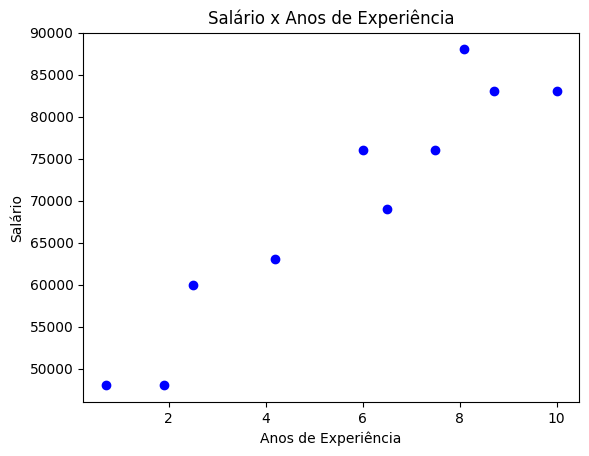

In [ ]:
salarioxanosexp=[(83000, 8.7), (88000, 8.1), 
                 (48000, 0.7), (76000, 6),
                 (69000, 6.5), (76000, 7.5),
                 (60000, 2.5), (83000, 10),
                 (48000, 1.9), (63000, 4.2)]

y=[y[0] for y in salarioxanosexp]
x=[x[1] for x in salarioxanosexp] # Separei salário e anos de experiência em eixos x e y para plotar o gráfico

import matplotlib.pyplot as plt
plt.plot(x, y, 'bo')
plt.title("Salário x Anos de Experiência")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.show()



Analisando o gráfico, temos que o salário é maior conforme os anos de experiência do trabalhador em ciência de dados. Mas agora vamos analisar a média salarial utilizando faixas de anos de experiência: <2, >2 e <5, >5

In [ ]:
import statistics

menor2=[]
entre2e5=[]
maior5=[] 
for anos in range(len(x)):
  if x[anos]<2:                     #Salário de quem tem <2 anos de experiência
    menor2.append(y[anos])
  elif x[anos]>=2 and x[anos]<=5:   #Salário de quem tem entre 2 e 5 anos de experiência
    entre2e5.append(y[anos])
  else:
    maior5.append(y[anos])          #Salário de quem tem >5 anos de experiência

#Média dos salários por faixa
media_menor2= statistics.mean(menor2)   #48000 dólares
media_entre2e5= statistics.mean(entre2e5) #61500 dólares
media_maior5= statistics.mean(maior5)   #79166.66666666667 dólares


Desta forma podemos observar que quem tem menos de 2 anos de experiência recebe aproximadamente 20 mil dólares a menos por ano do que quem tem masi de 5 anos de experiência.

# Lembrete de funcionalidades de Python
Aqui irei deixar algumas funcionalidades que aprendi recentemente para utilizar como consulta.

1. **Função Lambda:**
É uma função denominada anônima. Ela é utilizada quando queremos utilizá-la de parrâmetro em outra função. Assim o código fica mais enxuto. A seguir irei utilizar um exemplo com e sem a utilização da função lambda.

In [ ]:
valor=100

def imposto(valor): #Função para calcular o importo em cima do valor
  return valor*0.3

print(imposto(valor))

valor_lambda=lambda x: x*0.3 #Utilizando o Lambda
print(valor_lambda(valor))

30.0
30.0


2. **Função Map:**
Esta função aplica em cima de cada valor de uma lista a função. Porém se você não definí-lo como uma lista, ele não vai retornar os valores da maneira que você gostaria.

In [ ]:
lista=[10,20,30,40,50]

print(list(map(valor_lambda,lista)))

[3.0, 6.0, 9.0, 12.0, 15.0]


3. **Função Extend:** 
Concatena listas.

In [ ]:
a=[10,20,30]
a.extend([40,50,60])
print(a)

[10, 20, 30, 40, 50, 60]


4. Descompactar listas: 
Podemos descompactá-las de forma simples através de uma equação.

In [ ]:
a,b=[3,6] # 1º e 2º elementos considerados
_,b=[3,6] # Somente o 2º elemento considerado

5. **Tuplas:** As tuplas podem ser representados da seguinte maneira e não podem ser modificadas:

In [ ]:
t=(9,2) #representação com parênteses

T=9,2 #representação sem parênteses
T[0]=1 #Irá retornar erro pois não podemos modificar a Tupla

TypeError: ignored

6. **Dicionários:** Irei deixar algumas anotações sobre dicionários, pois ainda acabo esquecendo alguns pontos:

In [ ]:
dict_vazio={}                      #forma Pythonic
dict_vazio2=dict()                 #menos Pythonic
notas={"Lucas":9.8, "Diego": 6.3}  #dicionário literal

#Forma correta de verificar se um nome consta no dicionário criado e é rápido mesmo em dicts grandes
Manu_notas="Manusa" in notas #False
Lu_notas="Lucas" in notas    #True

#Forma de procurr valor em dict
Lu_notas2=notas.get("Lucas")     #9.8 -> poderia indicar a posição que se encontra também. No caso 0
Manu_notas2=notas.get("Manusa")  #Retorna None porque não existe

#Substituindo um valor 
notas["Diego"]=6.9

#Adicionando outra entrada em notas
notas["Isabella"]=7.4

chaves_notas=notas.keys()     #Retorna as chaves
valores_notas=notas.values()  #Retorna os valores das chaves
items_notas=notas.items()     #Retorna as chaves e valores (item no todo)

In [ ]:
from collection import defaultdict

"""A função defaultdict permite que manipulemos dicionários e na ausência 
de alguma chave/item, ele cria uma chave de valor zero ao invés de retornar erro"""

. 7. **Assertação/asserts:** Durante este estudo iremos utilizar a forma de verificação do correto funcionamento do código através da forma assertativa.

#Estatística

Neste capitulo o livro aborda um dos conceitos mais importantes dentro da ciência de dados: conceito de estatística para análise dos dados. Não irei entrar muito a fundo neste tópico porque já o estudei durante o curso de Engenharia Biomédica (inclusive programando em Python). Então mencionarei os tópicos mais importantes.

##Tendências Centrais
*   **Média:** é o metodo mais simples e rápido para a avaliação de uma tendência central, pois avalia o ponto central de um conjunto de dados. **Ponto negativo:** Sensibilidade a outliers.
*   **Mediana:** Requer a ordenação dos dados para dividí-los igualmente em duas partes e a mediana será o ponto central entre essas 2 metades. Caso o conjunto seja par, a mediana será a média dos dois pontos centrais.
*   **Moda:** Retorna os elementos que mais se repetem dentro do conjunto. 



##Dispersão

Ele avalia o nível de dispersão do conjunto de dados.

*   Amplitude: quando iguala zero indica que os dados não estão dispersos e quanto maior, maior é a dispersão.


In [ ]:
import matplotlib.pyplot as plt

num_friends1 = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
amplitude1=max(num_friends1)-min(num_friends1)

num_friends2 = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,1]
amplitude2=max(num_friends2)-min(num_friends2)

print(amplitude1,amplitude2) # Os dois dados possuem o mesmo valor de amplitude, mas o conjunto de dados é diferente. 
                             # Logo, a amplitude não depende do conjunto como um todo para descrever a dispersão e não diz muita coisa sozinho


99.0 99.0



* **Variância:** é uma medida de dispersão que mostra o quão distante os valores do conjunto estão do valor central médio.



In [20]:
import statistics
from statistics import variance

num_friends1 = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
num_friends2 = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,1]

var1=statistics.variance(num_friends1)
var2=statistics.variance(num_friends2)

print(var1,var2)

81.54351395730706 252.74332171893147


## **Covariância** 
Mede o quão distante os valores do conjunto x e y estão do valor central médio.

In [1]:
import numpy as np

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

#O livro adota num_friends como eixo x e daily_minutes como eixo y

cov=np.cov(num_friends,daily_minutes)
print(cov) #cov de xi e yj é igual a 22.42543514 (Cij) a posição cii=81.54351396 é a variância

'''Analisar somente a Covariância pode ser um pouco difícil, pois além os números não estão normalizados
e uma cov alta o baixa depende dos valores contidos nos conjuntos''' 


[[ 81.54351396  22.42543514]
 [ 22.42543514 100.78589895]]


##Correlação

Divide os desvios padrões das variáveis de x e y. Seu resultado está limitado entre -1 (correlação não perfeita ou anticorrelação perfeita) e 1 (correlação perfeita). Correlação=0 indica que não há correlação linear entre as duas variáveis.

In [11]:
import numpy as np

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


corr=cov[0][1]/np.std(num_friends)/np.std(daily_minutes)
print(corr) #corr=0.24858814299318 logo a correlação entre numero de amigos por pessoa e minutos nas redes sociais é positiva e fraca.



0.24858814299318


Plotando o gráfico de correlação, percebemos que temos outliers presentes e que isto afeta a nossa análise, pois a correlação é sensível a outlier.

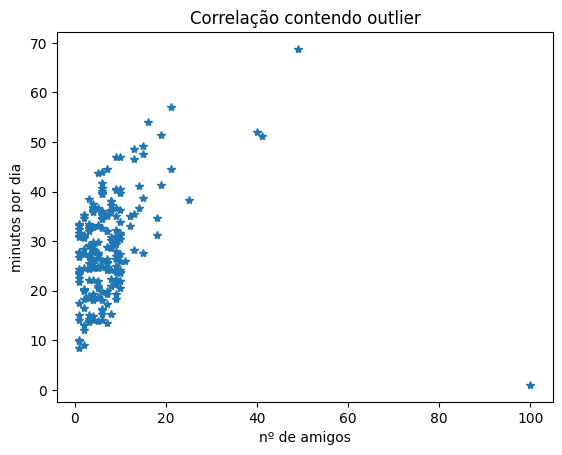

In [28]:
import matplotlib.pyplot as plt

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


plt.plot (num_friends,daily_minutes, '*')
plt.ylabel('minutos por dia')
plt.xlabel('nº de amigos')
plt.title('Correlação contendo outlier')
plt.show()

Como a discrepância entre a pessoa com 100 amigos e o demais é muito grande, iremos retirar este outlier.

0.5765192076634238


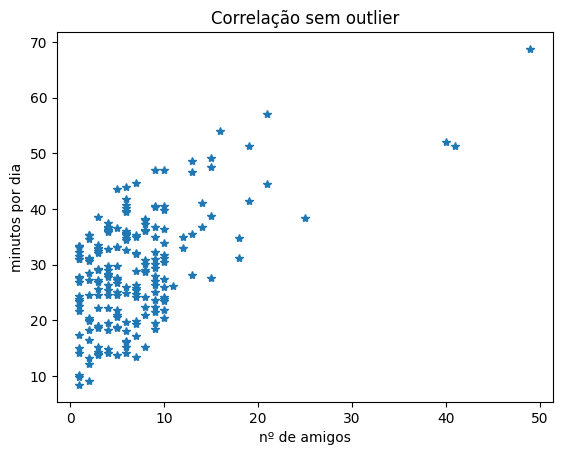

In [30]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

out=100
for i in range(len(num_friends)-1): #len num_friends=len daily_minutes
  if num_friends[i]==out:
    del num_friends[i] #exclui outlier 
    del daily_minutes[i] #exclui outlier 

cov=np.cov(num_friends,daily_minutes)
corr=cov[0][1]/np.std(num_friends)/np.std(daily_minutes)
print(corr) #corr=0.5765192076634238

#plotando o gráfico sem outlier
plt.plot (num_friends,daily_minutes, '*')
plt.ylabel('minutos por dia')
plt.xlabel('nº de amigos')
plt.title('Correlação sem outlier')
plt.show()

Para os temas de probabilidade e inferência, irei pulá-los pois ainda lembro bem da época da faculdade.

#Gradiente Descendente